야구선수 순위에 따른 분석

In [ ]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/LBang98/1-1/main/hitter.csv")
df1.index = df1.index + 1

df2 = pd.read_csv("https://raw.githubusercontent.com/LBang98/1-1/main/pitcher.csv")
df2.index = df2.index + 1


In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import font_manager
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#홈런(HR) 선두 선수
top_hr_player_info = df1.loc[df1['HR'].idxmax(), ['Name', 'Team']]

#타점(RBI) 선두 선수
top_rbi_player_info = df1.loc[df1['RBI'].idxmax(), ['Name', 'Team']]

#안타(H) 선두 선수
top_hits_player_info = df1.loc[df1['H'].idxmax(), ['Name', 'Team']]

print("홈런 많이 친 선수: ",top_hr_player_info)
print("타점 높은 선수: ",top_rbi_player_info)
print("안타 많이 친 선수: ",top_hits_player_info)


홈런 많이 친 선수:  Name    노시환
Team     한화
Name: 15, dtype: object
타점 높은 선수:  Name    노시환
Team     한화
Name: 15, dtype: object
안타 많이 친 선수:  Name    손아섭
Team     NC
Name: 1, dtype: object


In [ ]:
# 팀별 타자 성적 계산 (평균 타율, 홈런, 타점)
df1.groupby('Team').mean()[['AVG', 'HR', 'RBI']]


<ipython-input-30-74374a1877be>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('Team').mean()[['AVG', 'HR', 'RBI']]


,AVG,HR,RBI
Team,,,
KIA,0.302000,10.000000,69.250000
KT,0.290400,10.600000,62.400000
LG,0.303000,8.000000,72.666667
NC,0.314250,9.000000,71.500000
SSG,0.310000,20.500000,81.500000
두산,0.296000,9.500000,50.500000
롯데,0.302000,12.500000,70.000000
삼성,0.303667,14.333333,76.000000
키움,0.335000,7.000000,57.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

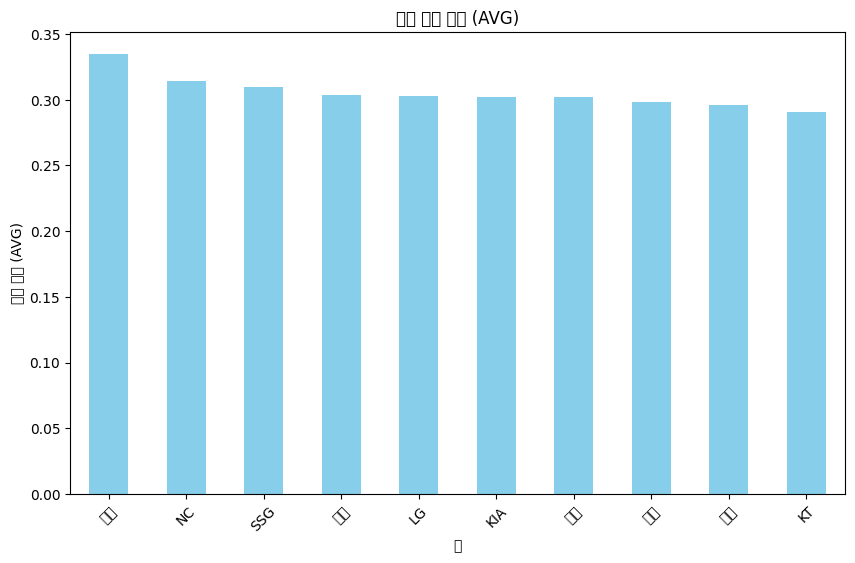

In [ ]:
team_avg = df1.groupby('Team')['AVG'].mean()

plt.figure(figsize=(10, 6))
team_avg.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('팀별 평균 타율 (AVG)')
plt.xlabel('팀')
plt.ylabel('평균 타율 (AVG)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 50880 (\N{HANGUL SYLLABLE UM}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  plt.tight_layout()
<ipython-input-6-3a721a4485d9>:23: UserWarning: Glyph 45936 (\N{H

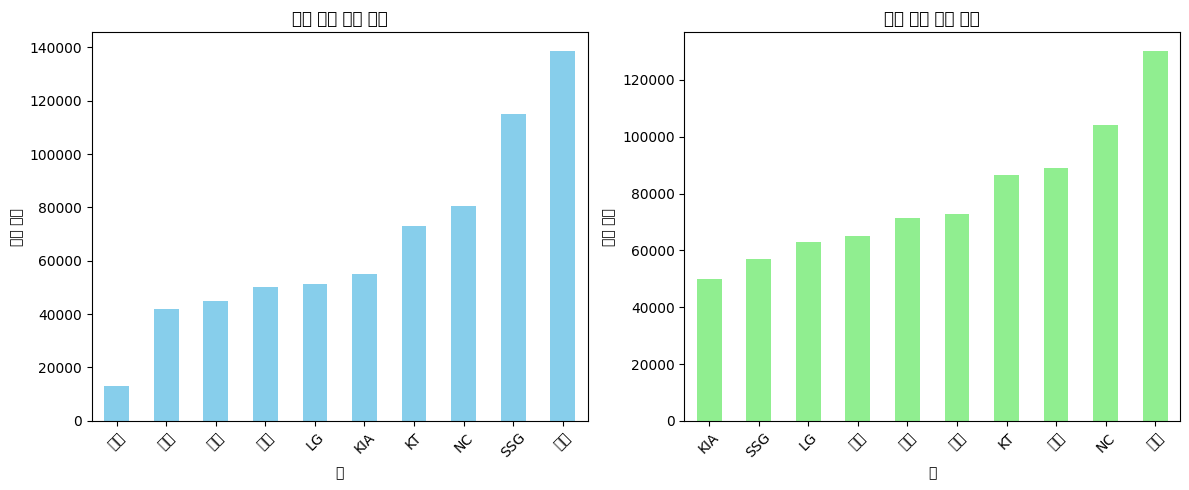

In [ ]:
avg_salary_batters = df1.groupby('Team')['SALARY'].mean()

plt.figure(figsize=(12, 5))

# 타자 평균 연봉 시각화
plt.subplot(1, 2, 1)
avg_salary_batters.sort_values().plot(kind='bar', color='skyblue')
plt.title('팀별 타자 평균 연봉')
plt.xlabel('팀')
plt.ylabel('평균 연봉')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 'HR' 열을 기준으로 두 그룹 나누기
high_hr = df1[df1['HR'] >= df1['HR'].median()]
low_hr = df1[df1['HR'] < df1['HR'].median()]

# 독립 표본 t-검정 수행
t_statistic, p_value = ttest_ind(high_hr['AVG'], low_hr['AVG'])

# 결과 출력
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# 유의수준 0.05에서의 가설 검정
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 홈런을 많이 친다고해서 타자순위에 높게 올라가지 않을 것으로 기대됩니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 홈런을 많이 친다고해서 타자순위에 높게 올라갈 것으로 기대됩니다.")


T-statistic: -0.9018008233840958
P-value: 0.3748549418329332
귀무가설을 기각할 수 없습니다. 홈런을 많이 친다고해서 타자순위에 높게 올라갈 것으로 기대됩니다.


In [ ]:
# 타자의 연봉 대비 성과 비율 계산

# 타자 : AVG, HR, 타점을 주요 지표로 활용
df1['Performance_Index'] = (df1['AVG'] + df1['HR'] + df1['RBI']) / df1['SALARY']


# 최고의 '돈 대비 가치' 플레이어 식별
# 타자
top_batters = df1.sort_values(by='Performance_Index', ascending=False).head()

top_batters



,Name,Team,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF,SALARY,Performance_Index
15,노시환,한화,0.298,131,595,514,85,153,30,1,31,278,101,0,3,13000,0.010177
19,문성주,LG,0.294,136,534,449,77,132,21,4,2,167,57,6,4,9500,0.006241
14,문보경,LG,0.301,131,542,469,77,141,29,5,10,210,72,9,4,17000,0.004841
17,김민혁,KT,0.297,113,448,397,68,118,20,3,3,153,41,7,5,15000,0.002953
11,양의지,두산,0.305,129,510,439,56,134,23,0,17,208,68,0,3,30000,0.002844


회귀 계수 (Regression Coefficients):

회귀 계수는 독립 변수(여기서는 AVG)가 한 단위 변할 때 종속 변수(HR 또는 RBI)가 얼마나 변하는지를 나타냅니다.
예를 들어, 회귀 계수가 양수라면 타율이 증가할수록 홈런이나 타점이 증가한다는 것을 의미합니다.
결정 계수 (R² 값):

결정 계수는 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다.
R² 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있다고 볼 수 있습니다.
반면, R² 값이 낮다면 모델이 데이터를 충분히 설명하지 못하고 있는 것을 의미할 수 있습니다.
시각적 분석 (Visualization):

산점도와 회귀선을 통해 AVG와 HR 또는 RBI 사이의 관계를 시각적으로 파악할 수 있습니다.
데이터가 회귀선 주변에 밀집되어 있으면 두 변수 사이에 강한 선형 관계가 있음을 나타낼 수 있습니다.
성능 평가 및 해석:

선형 회귀 모델의 성능을 평가하고, 이를 통해 타자의 성적(평균 타율)이 팀 성적(홈런, 타점)에 얼마나 영향을 미치는지 해석할 수 있습니다.
모델이 실제 데이터를 얼마나 잘 반영하는지에 따라, 타율이 팀의 득점력에 중요한 요소인지 판단할 수 있습니다.
이 분석을 통해 얻은 정보는 팀 관리자나 코치가 선수 구성 및 전략을 결정하는 데 도움이 될 수 있습니다. 예를 들어, 타율이 홈런과 강한 상관관계를 보이면, 높은 타율의 선수를 활용하여 득점력을 높일 수 있는 전략을 세울 수 있습니다.

홈런에 대한 회귀 계수: [-122.84628297]
홈런에 대한 결정 계수(R^2): 0.06742662054650694
타점에 대한 회귀 계수: [-141.13720118]
타점에 대한 결정 계수(R^2): 0.019618107974370136


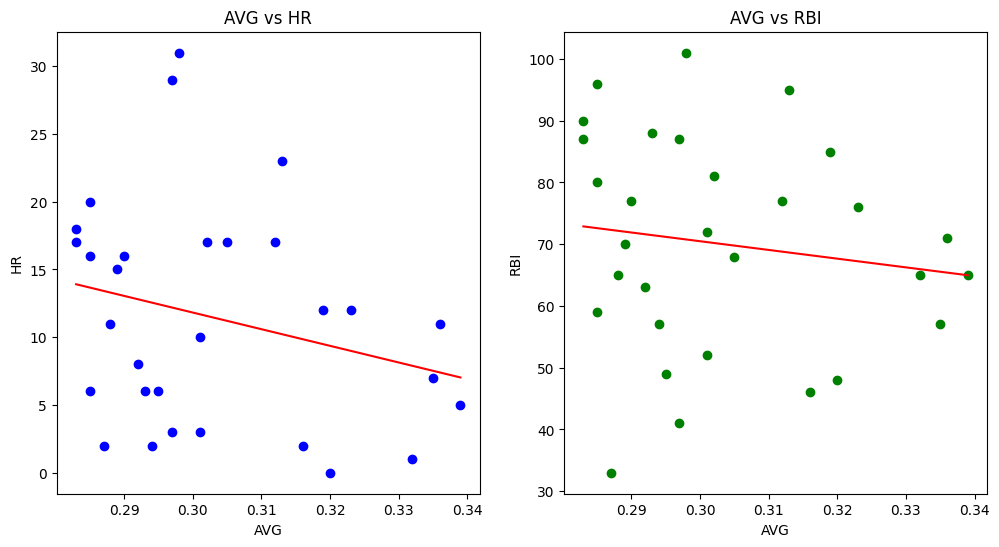

In [ ]:
# 타율을 독립 변수로 설정
X = df1[['AVG']]  # DataFrame에서 평균 타율 열만 추출

# 홈런과 타점을 각각 종속 변수로 설정
Y_hr = df1['HR']  # 홈런
Y_rbi = df1['RBI']  # 타점

# 선형 회귀 모델 생성 및 훈련
model_hr = LinearRegression().fit(X, Y_hr)
model_rbi = LinearRegression().fit(X, Y_rbi)

# 결과 출력
print("홈런에 대한 회귀 계수:", model_hr.coef_)
print("홈런에 대한 결정 계수(R^2):", model_hr.score(X, Y_hr))
print("타점에 대한 회귀 계수:", model_rbi.coef_)
print("타점에 대한 결정 계수(R^2):", model_rbi.score(X, Y_rbi))

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, Y_hr, color='blue')
plt.plot(X, model_hr.predict(X), color='red')
plt.title('AVG vs HR')
plt.xlabel('AVG')
plt.ylabel('HR')

plt.subplot(1, 2, 2)
plt.scatter(X, Y_rbi, color='green')
plt.plot(X, model_rbi.predict(X), color='red')
plt.title('AVG vs RBI')
plt.xlabel('AVG')
plt.ylabel('RBI')

plt.show()


In [ ]:
leading_pitchers_era = df2.loc[df2['ERA'].idxmin()]
leading_pitchers_wins = df2.loc[df2['W'].idxmax()]
leading_pitchers_strikeouts = df2.loc[df2['SO'].idxmax()]

# 결과 출력
print("최저 평균자책점: ", leading_pitchers_era)
print("최다 승리: ", leading_pitchers_wins)
print("최다 삼진: ", leading_pitchers_strikeouts)

최저 평균자책점:  Name           페디
Team           NC
ERA           2.0
G              30
W              20
L               6
SV              0
HLD             0
WPCT        0.769
IP        180 1/3
H             137
BB             35
HBP             4
SO            209
R              46
ER             40
WHIP         0.95
SALARY     104000
Name: 1, dtype: object
최다 승리:  Name           페디
Team           NC
ERA           2.0
G              30
W              20
L               6
SV              0
HLD             0
WPCT        0.769
IP        180 1/3
H             137
BB             35
HBP             4
SO            209
R              46
ER             40
WHIP         0.95
SALARY     104000
Name: 1, dtype: object
최다 삼진:  Name           페디
Team           NC
ERA           2.0
G              30
W              20
L               6
SV              0
HLD             0
WPCT        0.769
IP        180 1/3
H             137
BB             35
HBP             4
SO            209
R              46
ER       

<ipython-input-11-aac345ca20ce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_pitching_stats = df2.groupby('Team').mean()
<ipython-input-11-aac345ca20ce>:28: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.tight_layout()
<ipython-input-11-aac345ca20ce>:28: UserWarning: Glyph 50880 (\N{HANGUL SYLLABLE UM}) missing from current font.
  plt.tight_layout()
<ipython-input-11-aac345ca20ce>:28: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.tight_layout()
<ipython-input-11-aac345ca20ce>:28: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-aac345ca20ce>:28: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
<ipyt

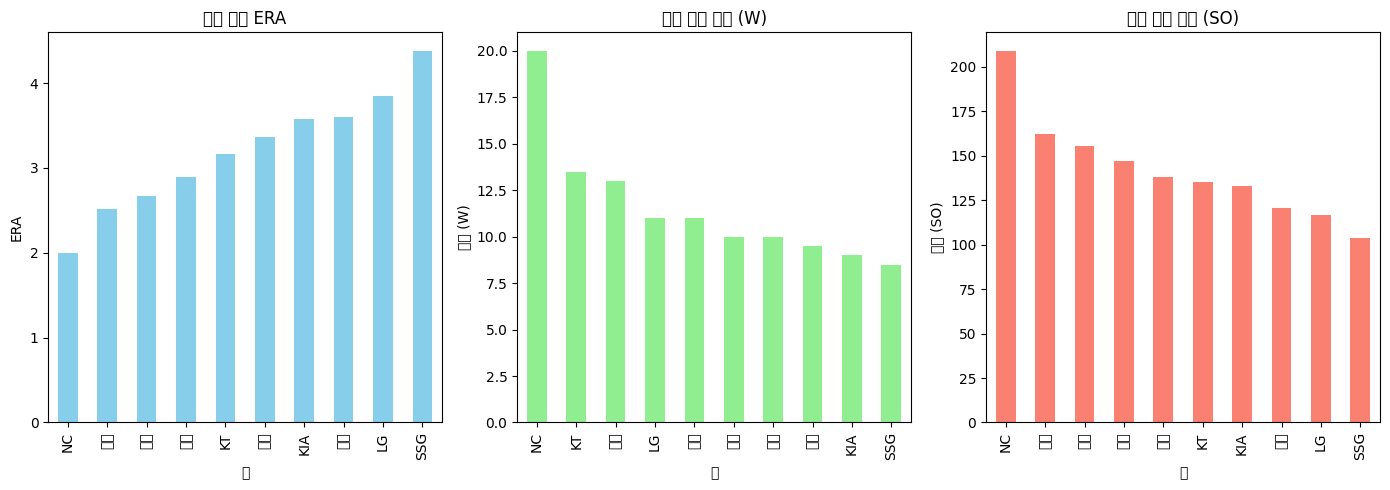

,ERA,W,SO
Team,,,
KIA,3.580,9.0,133.000000
KT,3.160,13.5,135.500000
LG,3.850,11.0,116.666667
NC,2.000,20.0,209.000000
SSG,4.380,8.5,103.500000
두산,2.670,13.0,162.000000
롯데,3.365,10.0,138.000000
삼성,2.890,9.5,120.500000
키움,2.520,10.0,155.500000


In [ ]:
# 2. 팀별 투수 성적 계산
team_pitching_stats = df2.groupby('Team').mean()

# 팀별 ERA, 승리(W), 삼진(SO) 시각화
plt.figure(figsize=(14, 5))

# 팀별 평균 ERA 시각화
plt.subplot(1, 3, 1)
team_pitching_stats['ERA'].sort_values().plot(kind='bar', color='skyblue')
plt.title('팀별 평균 ERA')
plt.xlabel('팀')
plt.ylabel('ERA')

# 팀별 평균 승리(W) 시각화
plt.subplot(1, 3, 2)
team_pitching_stats['W'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('팀별 평균 승리 (W)')
plt.xlabel('팀')
plt.ylabel('승리 (W)')

# 팀별 평균 삼진(SO) 시각화
plt.subplot(1, 3, 3)
team_pitching_stats['SO'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('팀별 평균 삼진 (SO)')
plt.xlabel('팀')
plt.ylabel('삼진 (SO)')

plt.tight_layout()
plt.show()

# 팀별 투수 성적 출력
team_pitching_stats[['ERA', 'W', 'SO']]


<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 50880 (\N{HANGUL SYLLABLE UM}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
<ipython-input-26-042a7ad7b5d4>:13: UserWarning: Glyph 494

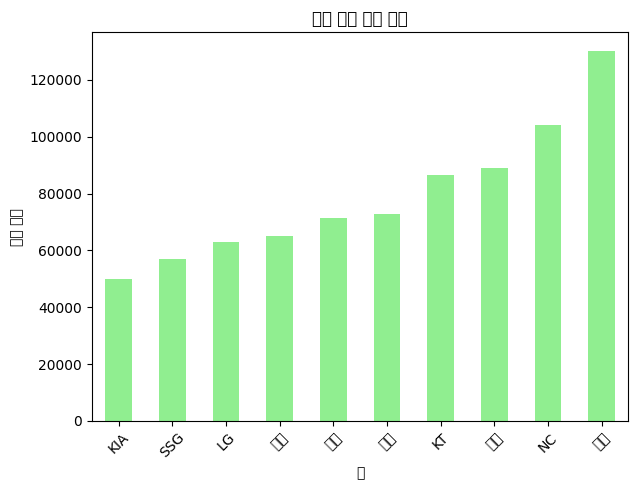

In [ ]:
plt.figure(figsize=(12, 5))

# 투수 평균 연봉 시각화
avg_salary_pitchers = df2.groupby('Team')['SALARY'].mean()

plt.subplot(1, 2, 2)
avg_salary_pitchers.sort_values().plot(kind='bar', color='lightgreen')
plt.title('팀별 투수 평균 연봉')
plt.xlabel('팀')
plt.ylabel('평균 연봉')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#투수의 연봉 대비 성과 비율 계산

df2['Value_Index'] = (df2['W'] + df2['SO'] - df2['ERA']) / df2['SALARY']

top_value_pitchers = df2.sort_values(by='Value_Index', ascending=False).head()
top_value_pitchers[['Name', 'Team', 'ERA', 'W', 'SO', 'SALARY', 'Value_Index']]


,Name,Team,ERA,W,SO,SALARY,Value_Index
9,임찬규,LG,3.42,14,103,17000,0.006681
17,오원석,SSG,5.23,8,88,14000,0.006484
2,안우진,키움,2.39,9,164,35000,0.004875
16,최원태,LG,4.30,9,118,35000,0.003506
7,원태인,삼성,3.24,7,102,35000,0.003022


삼진 수가 팀 성적과 얼마나 연관이 있는지를 파악하는 데 도움을 줄 것입니다.
팀별 삼진(SO) 수와 순위 분석 결과
시각화를 통해 팀별 삼진(SO) 수와 순위 간의 관계를 살펴본 결과, 다음과 같은 관찰을 할 수 있습니다:

NC, 삼성, 키움 팀의 삼진 수 데이터가 제공되어 이들 팀에 대해서만 분석이 가능했습니다.
NC 팀은 가장 많은 삼진 수와 높은 순위(4위)를 기록했습니다.
삼성 팀은 중간 정도의 삼진 수를 기록하며 8위를 차지했습니다.
키움 팀은 높은 삼진 수를 기록했음에도 불구하고 9위를 기록했습니다.

승리의 중요성:

승리의 수가 순위 결정에 중요한 역할을 합니다. 승리가 많은 팀은 높은 순위를 차지하는 경향이 있으며, 이는 경기에서의 성공이 리그에서의 전반적인 성공으로 이어짐을 시사합니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

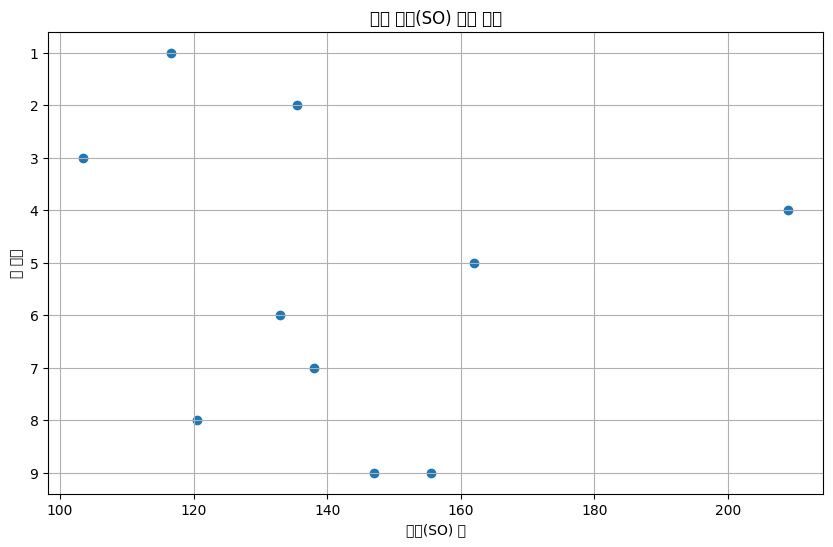

,Team,SO
1,LG,116.666667
2,KT,135.500000
3,SSG,103.500000
4,NC,209.000000
5,두산,162.000000
6,KIA,133.000000
7,롯데,138.000000
8,삼성,120.500000
9,한화,147.000000
10,키움,155.500000


In [ ]:
team_standings_data = {
    "Team": ["LG", "KT", "SSG", "NC", "두산", "KIA", "롯데", "삼성", "한화", "키움"],
    "Games": [144, 144, 144, 144, 144, 144, 144, 144, 144, 144],
    "Wins": [86, 79, 76, 75, 74, 73, 68, 61, 58, 58],
    "Losses": [56, 62, 65, 67, 68, 69, 76, 82, 80, 83],
    "Draws": [2, 3, 3, 2, 2, 2, 0, 1, 6, 3]
}
team_standings = pd.DataFrame(team_standings_data)

# 팀별 순위 추가
team_standings['Rank'] = team_standings['Wins'].rank(ascending=False, method='min').astype(int)

# 팀별 삼진(SO) 통계와 결합
team_standings = team_standings.merge(team_pitching_stats[['SO']], on='Team', how='left')

# 삼진 수와 순위 간의 관계 분석을 위한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(team_standings['SO'], team_standings['Rank'])
plt.gca().invert_yaxis()  # 낮은 순위가 높은 숫자를 가지므로 y축을 반전합니다.
plt.title('팀별 삼진(SO) 수와 순위')
plt.xlabel('삼진(SO) 수')
plt.ylabel('팀 순위')
plt.grid(True)
plt.show()

# 분석에 사용된 데이터 출력
team_standings.index = range(1, len(team_standings) + 1)

team_standings[['Team', 'SO']]


투수 데이터를 이용해 회귀분석을 수행하겠습니다. 이 분석의 목적은 선수의 성적과 연봉 간의 관계를 파악하는 것입니다. 회귀분석은 통계적 방법을 사용하여 변수 간의 관계를 모델링합니다. 여기서는 연봉(SALARY)을 종속 변수로, 주요 투수 성적 지표(예: ERA, 승리, 삼진 등)를 독립 변수로 사용할 것입니다.

모델 계수
ERA 계수: -12.54
승리(W) 계수: 353.66
삼진(SO) 계수: 1446.78
모델 해석
ERA: ERA가 1 단위 증가할 때마다 연봉은 평균적으로 12.54 단위 감소합니다. 즉, ERA가 낮을수록 연봉이 높아지는 경향이 있음을 나타냅니다.
승리(W): 승리가 1 단위 증가할 때마다 연봉은 평균적으로 353.66 단위 증가합니다. 승리가 많은 투수가 더 높은 연봉을 받는 경향이 있음을 보여줍니다.
삼진(SO): 삼진이 1 단위 증가할 때마다 연봉은 평균적으로 1446.78 단위 증가합니다. 삼진을 많이 잡는 투수가 높은 연봉을 받는 경향이 있음을 나타냅니다.
모델 성능
평균 제곱 오차(MSE): 20,480,556,955.64
R² 점수: NaN

In [ ]:
X = df2[['ERA', 'W', 'SO']]  # 독립 변수 (ERA, 승리, 삼진)
y = df2['SALARY']            # 종속 변수 (연봉)

# 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 결과 해석
# 계수 출력
coefficients = model.coef_
intercept = model.intercept_

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients, intercept, mse, r2

(array([-16177.56380246,  -3165.41854938,    650.2186206 ]),
 85828.97308230474,
 3862231330.9963627,
 -0.37976871181239646)

선형 회귀 모델의 계수들과 그 통계적 유의성을 검토할 수 있습니다. 각 귀무 가설의 경우, 관련 변수(ERA, 승리, 삼진)의 회귀 계수가 유의미하게 0이 아닌지를 검증하는 것이 핵심입니다.

통계적 유의성을 검정하기 위해서는 일반적으로 p-값을 사용합니다. p-값이 특정 유의수준(예: 0.05)보다 낮으면 귀무 가설을 기각하고, 그렇지 않으면 귀무 가설을 채택합니다.

선형 회귀 모델에서 각 계수의 p-값을 얻기 위해 statsmodels 라이브러리를 사용할 수 있습니다. 이를 통해 각 귀무 가설에 대한 통계적 검정을 수행하겠습니다.

귀무가설 1: ERA가 낮으면 연봉이 높아진다.
귀무가설 2: 승리가 많은 투수는 연봉을 많이 받는다.
귀무가설 3: 삼진을 많이 잡으면 연봉을 많이 받는다.
각 귀무 가설에 대한 p-값을 계산하고, 이를 유의수준 0.05와 비교하여 가설을 검정하겠습니다.

In [ ]:
# 독립 변수에 상수항 추가 (회귀분석을 위해 필요)
X_with_const = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X_with_const).fit()

# 요약 결과에서 p-값 추출
p_values = model.pvalues
p_values



const    0.869127
ERA      0.937857
W        0.860461
SO       0.252378
dtype: float64